## Setup

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib parameters
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['figure.dpi'] = 300

## Read Data

In [81]:
# Read data
data = pd.read_csv("yearly-number-of-objects-launched-into-outer-space.csv")

## Prepare Data

In [82]:
# Subset Data
launches = data[['Entity', 'yearly_launches']]

# Group by Entity
launches = launches.groupby('Entity', as_index = False)['yearly_launches'].sum()
launches = pd.DataFrame(launches)

# Remove World as yearly total
launches = launches[launches['Entity'] != 'World']

# Filter Smaller Entities
launches = launches[launches['yearly_launches'] > 133] # Lazy way of getting top 6 entities

# Sort from smallest to largest
launches.sort_values(by = ['yearly_launches'], inplace = True)

# Reset index
launches.reset_index(drop = True, inplace = True)

## Default Horizontal Bar Chart

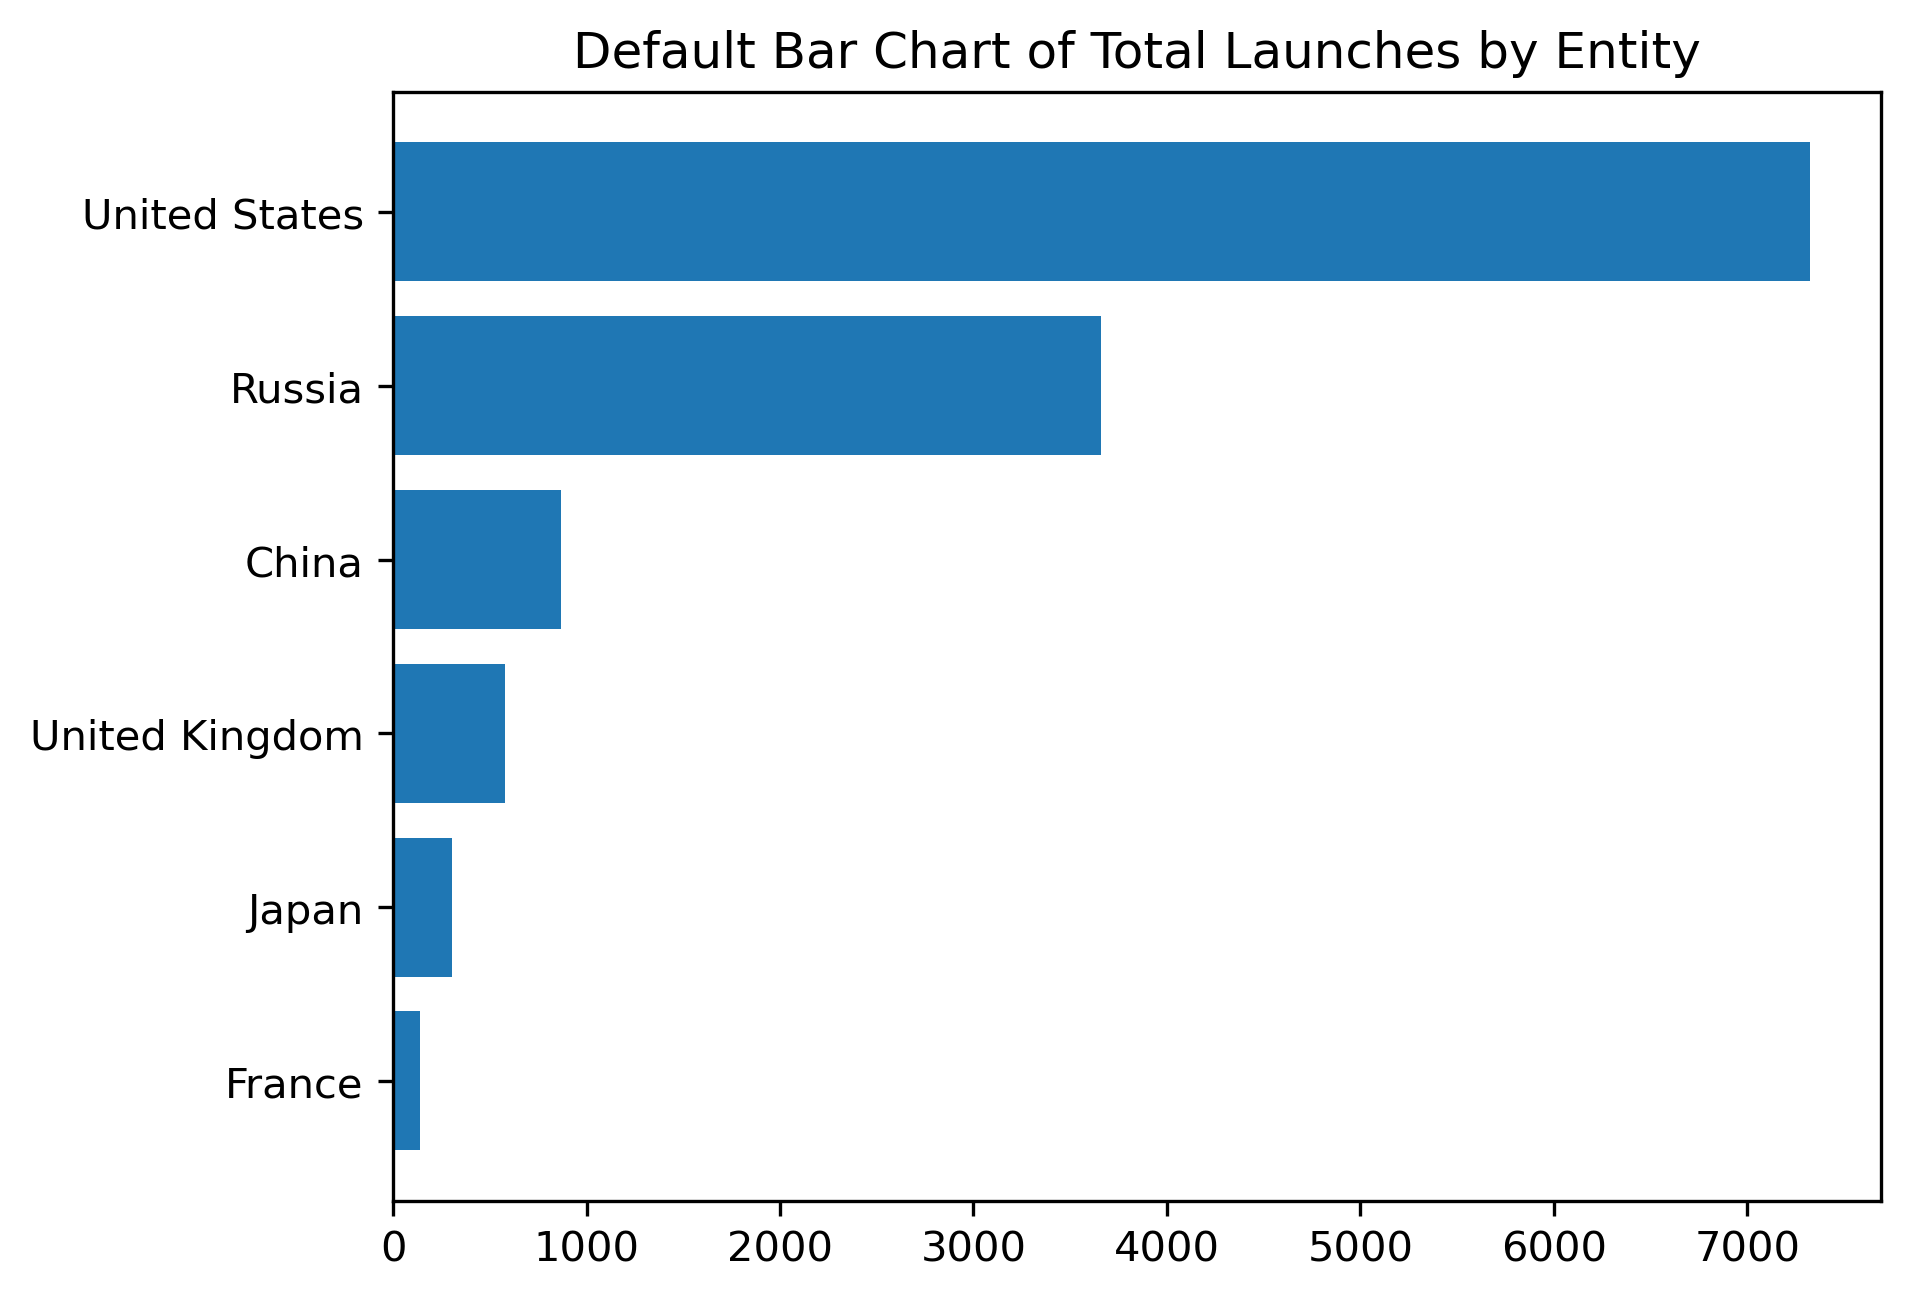

In [83]:
fig1, ax = plt.subplots()
plt.barh(launches['Entity'], width = launches['yearly_launches'])
ax.set_title('Default Bar Chart of Total Launches by Entity');

## My Standard Horizontal Bar Chart

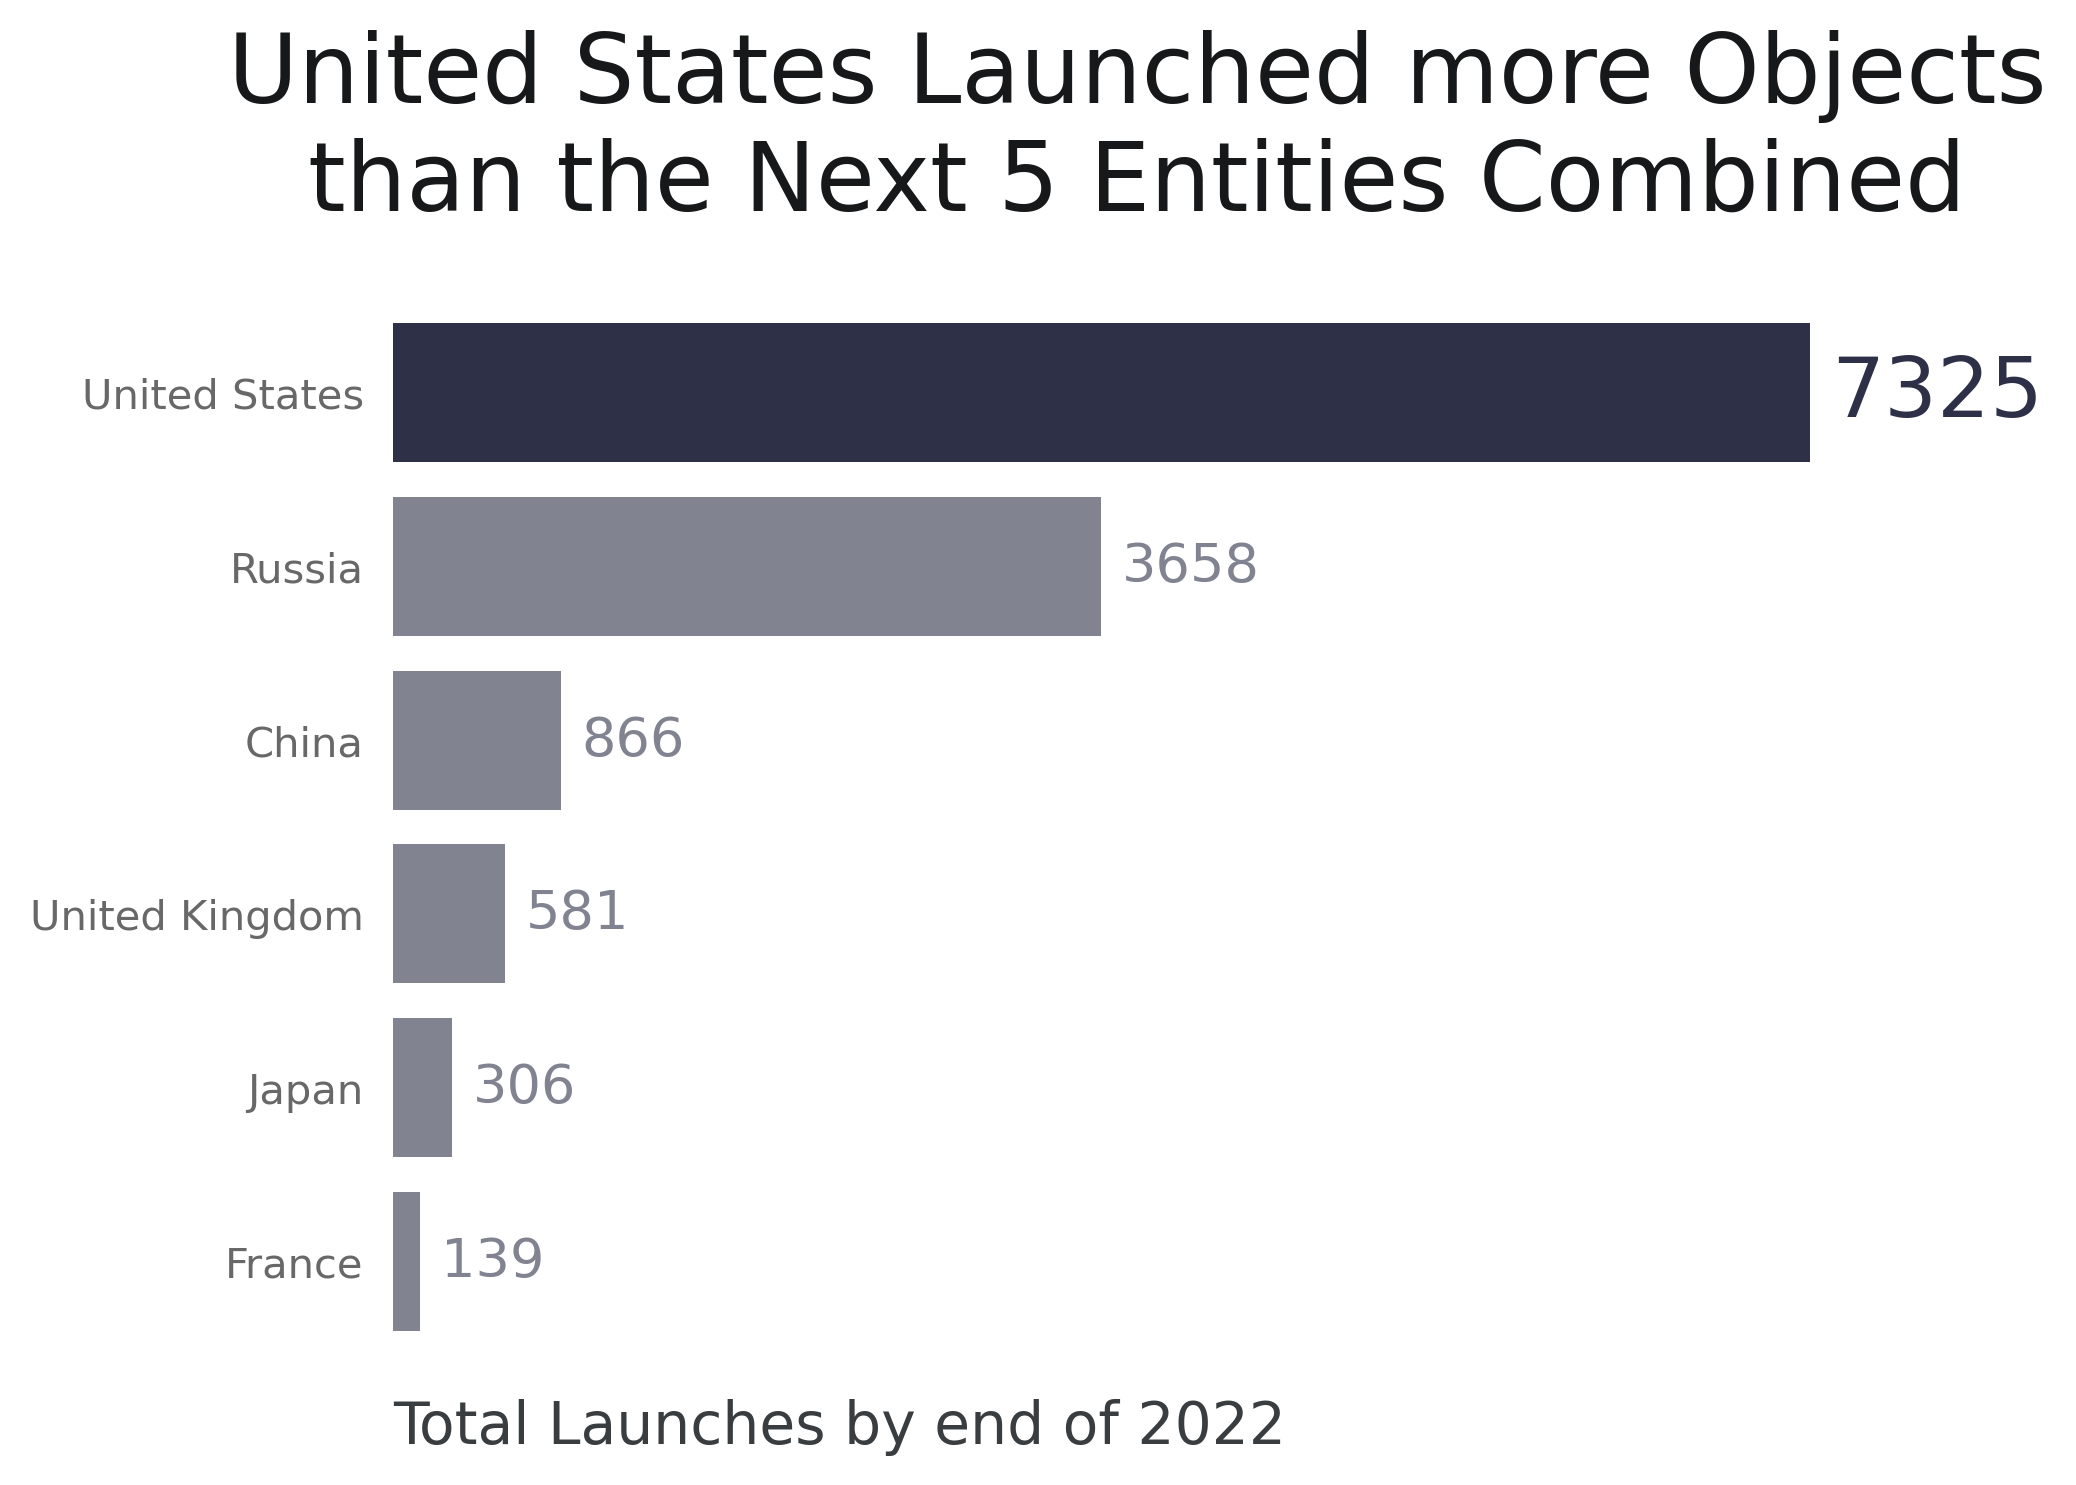

In [84]:
# Color list
colors_barh = ['#2d3047' if i == 'United States' else '#818391' for i in launches['Entity']]

fig2, ax = plt.subplots()
plt.barh(launches['Entity'], width = launches['yearly_launches'], color = colors_barh)
ax.set_title('United States Launched more Objects\nthan the Next 5 Entities Combined', fontsize = 23, pad = 15).set_color('#171819')
for pos in ['right', 'top', 'bottom']:
	plt.gca().spines[pos].set_visible(False)
ax.spines['bottom'].set_visible(0)
ax.spines['left'].set_visible(0)
plt.xticks([])
ax.tick_params(axis = 'y', which = 'both', right = False,
				left = False, colors = '#686868')
ax.tick_params(axis = 'x', which = 'both', top = False,
				bottom = False, colors = '#686868')
ax.set_xlabel('Total Launches by end of 2022', fontsize = 14, loc = 'left').set_color('#393d3f')
barlabels = ax.bar_label(ax.containers[0], padding = 5, size = 13, color = '#818391')
# access United States label and change properties
barlabels[5].set_font_properties({'size': 20})
barlabels[5].set_color('#2d3047')
plt.show();